In [2]:
import pandas_datareader.data as web

In [68]:
aapl_df = web.DataReader('AAPL', 'yahoo', start='2020-06-01', end='2021-06-01')

In [69]:
msft_df = web.DataReader('MSFT', 'yahoo', start='2020-06-01', end='2021-06-01')

In [70]:
aapl_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,80.587502,79.302498,79.437500,80.462502,80791200.0,79.804398
2020-06-02,80.860001,79.732498,80.187500,80.834999,87642800.0,80.173859
2020-06-03,81.550003,80.574997,81.165001,81.279999,104491200.0,80.615211
2020-06-04,81.404999,80.195000,81.097504,80.580002,87560400.0,79.920929
2020-06-05,82.937500,80.807503,80.837502,82.875000,137250400.0,82.197166
...,...,...,...,...,...,...
2021-05-25,128.320007,126.320000,127.820000,126.900002,72009500.0,126.710159
2021-05-26,127.389999,126.419998,126.959999,126.849998,56575900.0,126.660225
2021-05-27,127.639999,125.080002,126.440002,125.279999,94625600.0,125.092575


In [71]:
msft_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,183.000000,181.460007,182.539993,182.830002,22622400.0,180.730728
2020-06-02,185.000000,181.350006,184.250000,184.910004,30794600.0,182.786850
2020-06-03,185.940002,183.580002,184.820007,185.360001,27311000.0,183.231674
2020-06-04,185.839996,182.300003,184.300003,182.919998,28761800.0,180.819687
2020-06-05,187.729996,182.009995,182.619995,187.199997,39893600.0,185.050537
...,...,...,...,...,...,...
2021-05-25,252.750000,250.820007,251.770004,251.720001,17704300.0,251.239029
2021-05-26,252.940002,250.750000,251.429993,251.490005,17771600.0,251.009476
2021-05-27,251.479996,249.250000,251.169998,249.309998,24426200.0,248.833633


In [72]:
aapl_df['Daily Return'] = aapl_df['Adj Close'].pct_change(1)

In [73]:
msft_df['Daily Return'] = msft_df['Adj Close'].pct_change(1)

In [74]:
aapl_df = aapl_df.dropna()

In [75]:
msft_df = msft_df.dropna()

In [76]:
aapl_df['Daily Return'].std()

0.022217213165663097

In [84]:
def compute_sharpe_ratio(df, risk_free_rate=0):
    mean_return = df['Daily Return'].mean()
    std = df['Daily Return'].std()
    sharpe_ratio = (mean_return-risk_free_rate)/std
    return sharpe_ratio * (len(df)**0.5)

In [85]:
compute_sharpe_ratio(aapl_df)

1.4280819681493646

In [86]:
compute_sharpe_ratio(msft_df)

1.2599509025723445

In [92]:
def compute_sortino_ratio(df, threshold=0, risk_free_rate=0):
    mean_return = df['Daily Return'].mean()
    threshold_std = df[df['Daily Return']< threshold]['Daily Return'].std()
    sortino_ratio = (mean_return-risk_free_rate)/threshold_std
    return sortino_ratio * (252**0.5)

In [93]:
compute_sortino_ratio(aapl_df)

2.158639382941981

<AxesSubplot:xlabel='Date'>

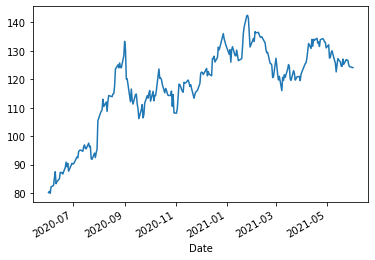

In [95]:
aapl_df['Adj Close'].plot()

In [96]:
compute_sortino_ratio(msft_df)

1.801924800315661

<AxesSubplot:xlabel='Date'>

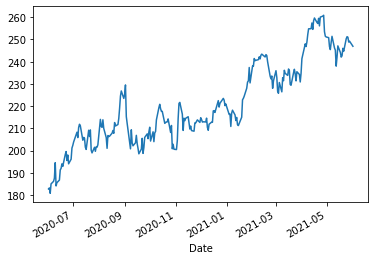

In [97]:
msft_df['Adj Close'].plot()